In [6]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

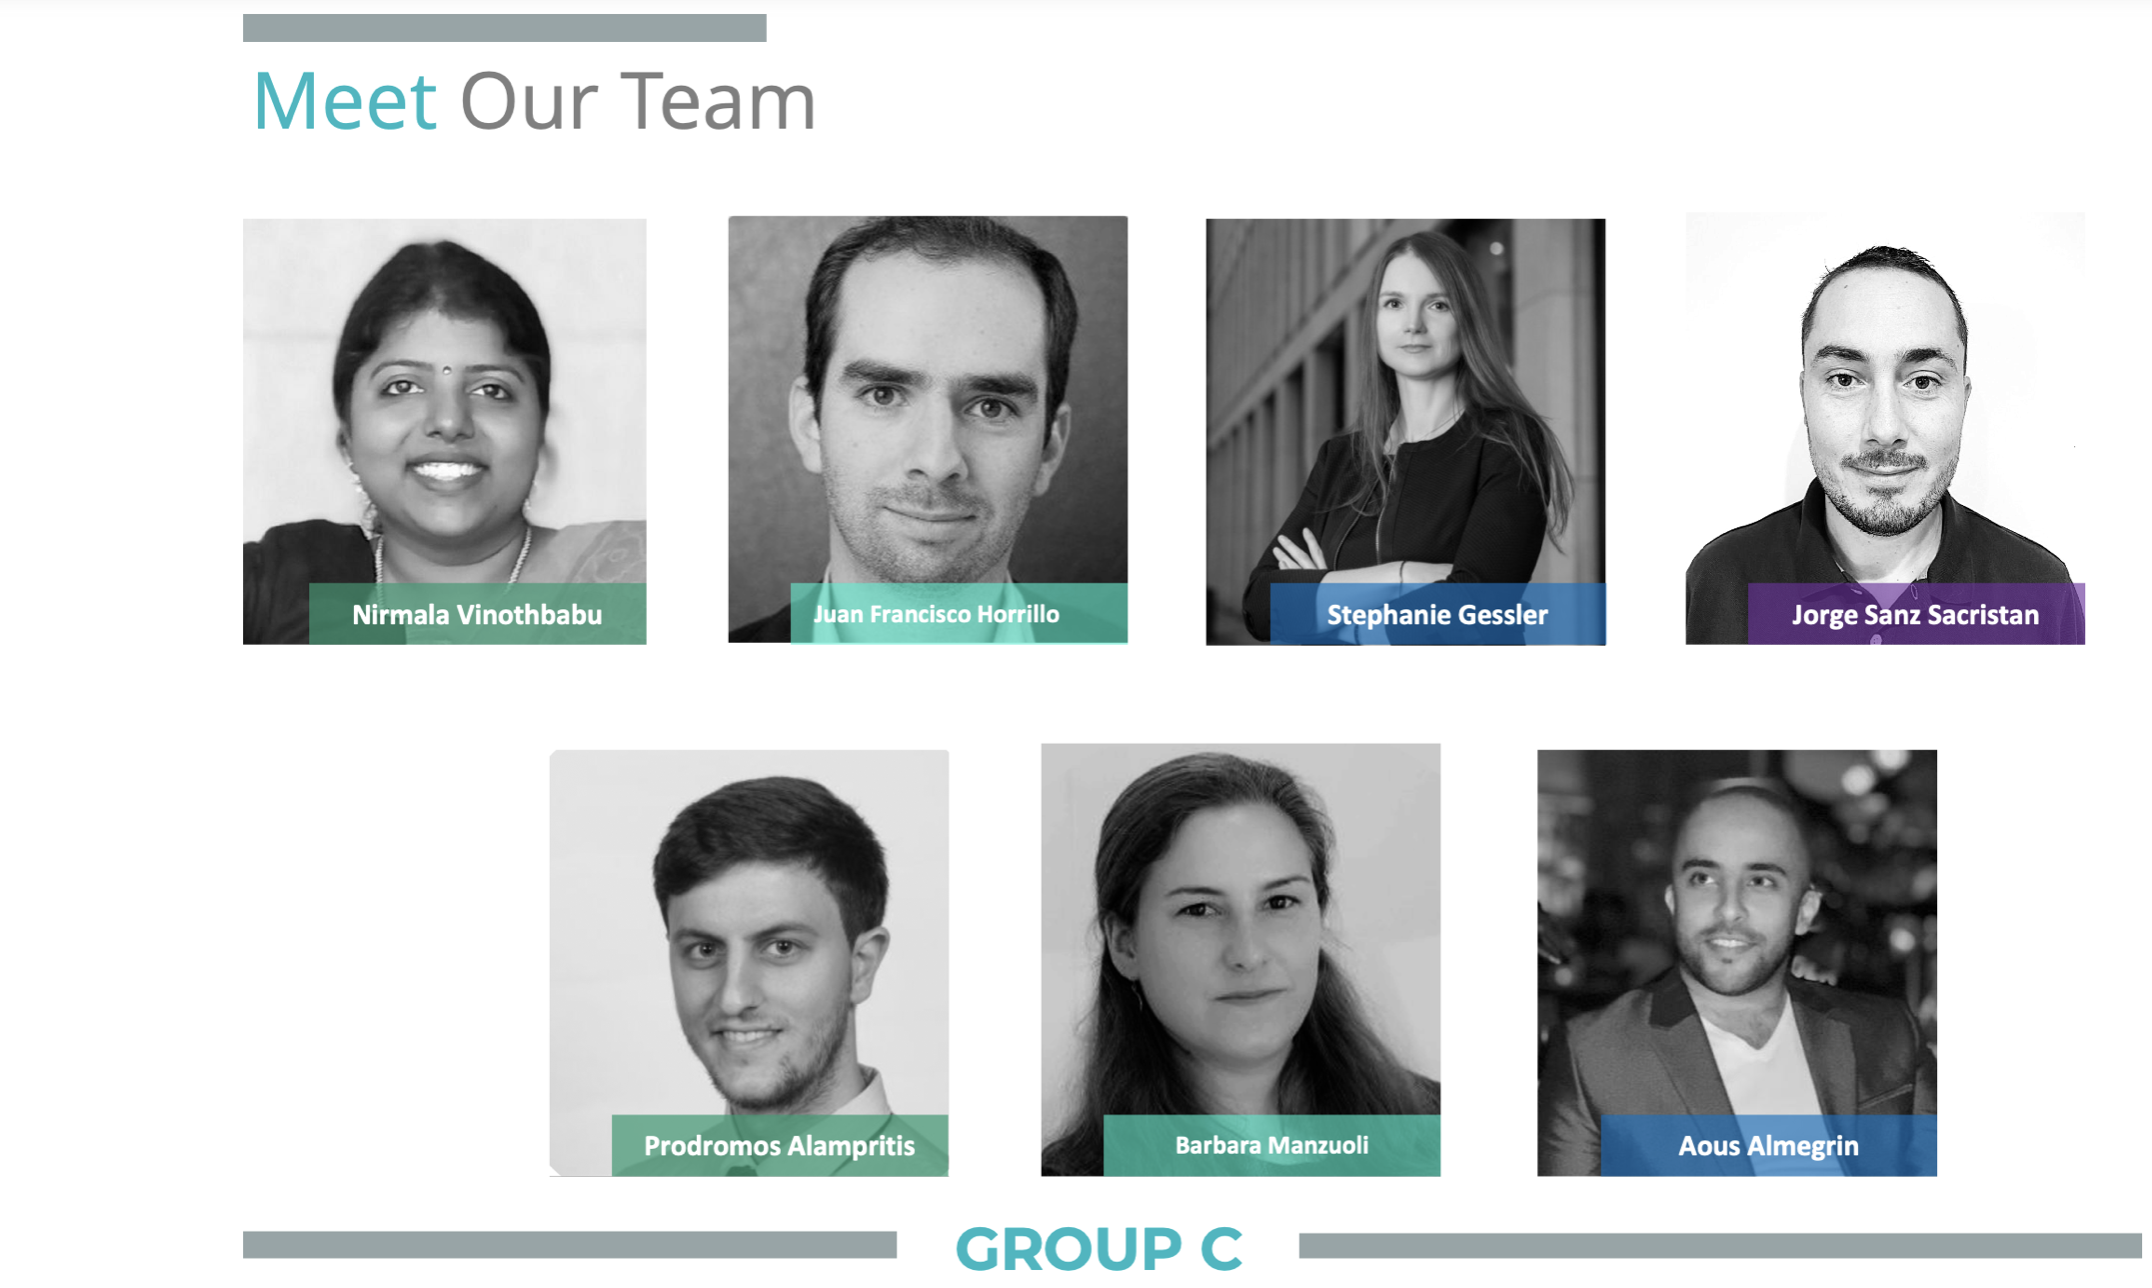

In [ ]:
# <font color=li_blue> Table of contents </font>

# <font color=purple> Sections </font>

* [1.Business Problem](#1)
* [2.Libaries used](#2)
* [3. Setup](#3)
  * [3.1 Start MariaDB](#3.1)
  * [3.2 Start Hadoop](#3.2)  
  * [3.3 Search for Spark Installation](#3.3)
  * [3.4 Create SparkSession](#3.4)
  * [3.5 Data Preparation](#3.5)
      * [3.5.1 Raw DataFrame](#3.5.1)
      * [3.5.2 DataFrame Vertices](#3.5.2)
      * [3.5.3 Countries Dataframe Vertices](#3.5.3)
      * [3.5.4 Countries Flows Dataframe](#3.5.4)
          * [3.5.4.1 Detailed Graph](#3.5.4.1)
      * [3.5.5 Country Aggregated Graph](#3.5.5)

In [8]:
import csv
import pandas as pd

In [9]:
#file = open('madrid_transactions.csv')
#disk_ev = csv.reader(file)

In [10]:
df = pd.read_csv('madrid_transactions_country.csv', delimiter=';', skiprows=0, low_memory=False)
#df = pd.read_csv('madrid_transactions2.csv')
#df = pd.read_csv('madrid_transactions2.csv', encoding='utf-8',delimiter=',',lineterminator='\n',low_memory=False,skiprows=0)

#df = pd.read_excel('madrid_transactions_country.xls')

In [11]:
df.columns

Index(['Unnamed: 0', 'amount', 'category', 'customer_country', 'daytime',
       'hour', 'tx_date_proc', 'weekday', 'Date_new ', 'Numericcode',
       'Latitude(average)', 'Longitude(average)', 'Country_name', 'alpha-3',
       'country-code', 'iso_3166-2', 'Region', 'sub-region', 'GDP_USD_2012',
       'GDP, PPP (current international $)', 'GDP growth (annual %) ',
       'Income_classification ', 'PPP_2012',
       'Gross domestic income (constant LCU)',
       'Adjusted net national income per capita (constant 2015 US$)',
       'Income_classification .1',
       'GNI per capita, PPP (current international $)'],
      dtype='object')

In [12]:
# Heatmap 
ggplot(df, aes("category", "Income_classification ", fill= "amount")) + geom_tile()

NameError: name 'ggplot' is not defined

In [13]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z= df["amount"],
                   x=df["Income_classification "],
                   y=df["category"],
                   hoverongaps = False))
fig.show()

In [14]:
#pip install pycountry

In [15]:
#import pycountry

In [ ]:
#df2 = pd.read_csv('countries_coordinates.csv',delimiter=";",error_bad_lines=False)

In [ ]:
#df2

In [ ]:
#pip install pgeocode

In [ ]:
#df["customer_country"] = df.customer_country.astype(str)

In [ ]:
#df2["Alpha_2code"] = df2.Alpha_2code.astype(str)

In [ ]:
#import pgeocode

In [ ]:
#df.customer_country = df.customer_country.str.encode('utf-8')
#df2.Alpha_2code = df2.Alpha_2code.str.encode('utf-8')

In [ ]:
#df.merge(df2, on="customer_country", how="Alpha_2code")
#df['customer_country'] = df.merge(df2, how='left', on=['customer_country', 'Alpha_2code'])['customer_country'].values

In [ ]:
#pip install ggplot

In [ ]:
#pip install plotnine

In [53]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap,stat_summary,theme_bw
from plotnine import ggplot, aes, geom_bar, coord_flip,labs

ImportError: cannot import name 'geom_density_ridges' from 'plotnine' (/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/plotnine/__init__.py)

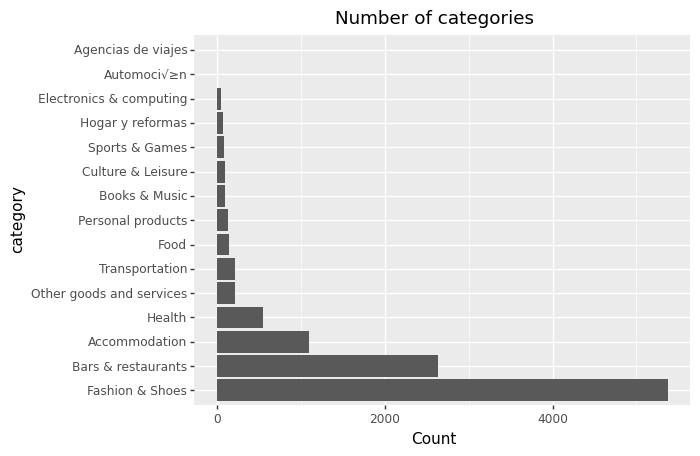

<ggplot: (8783737230728)>

In [17]:
# Determine order and create a categorical type
# Note that value_counts() is already sorted
cat_list = df['category'].value_counts().index.tolist()
df_cat = pd.Categorical(df['category'], categories=cat_list)

# assign to a new column in the DataFrame
df2 = df.assign(df_cat = df_cat)

(ggplot(df2)
 + aes(x='df_cat')
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='category', title='Number of categories')
)

In [18]:
from plotnine import *
import numpy as np
import pandas as pd

p1 = ggplot(df,aes(x="hour",y="amount",color="category"))+geom_line()


In [19]:
ggplotly(p1.draw())

NameError: name 'ggplotly' is not defined

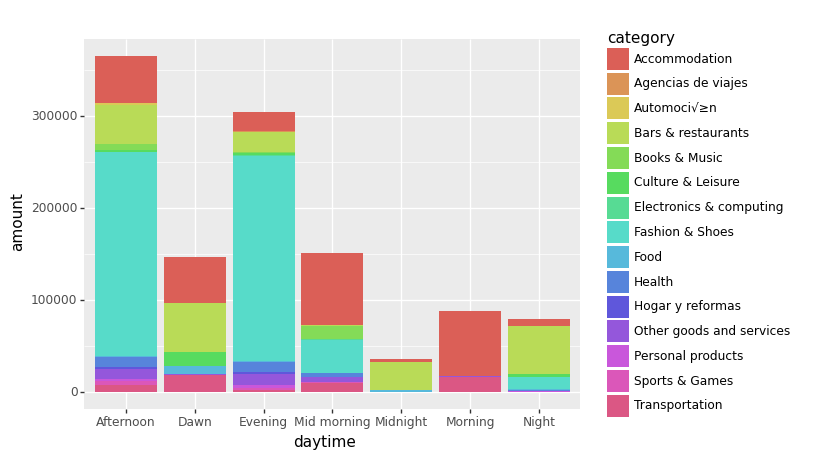

<ggplot: (8783805231460)>

In [20]:
import plotnine
plotnine.ggplot(df, plotnine.aes(x='daytime', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 
#+ \
    #plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "text")
#plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "text")

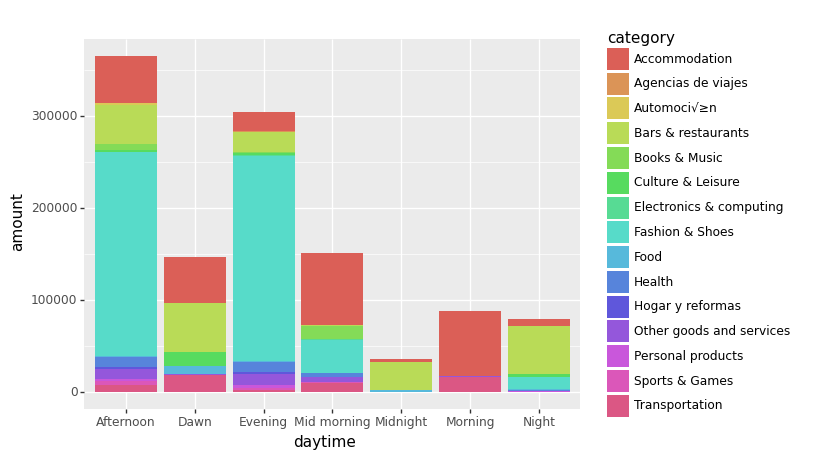

<ggplot: (8783755225302)>

In [21]:
plotnine.ggplot(df, plotnine.aes(x='daytime', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 

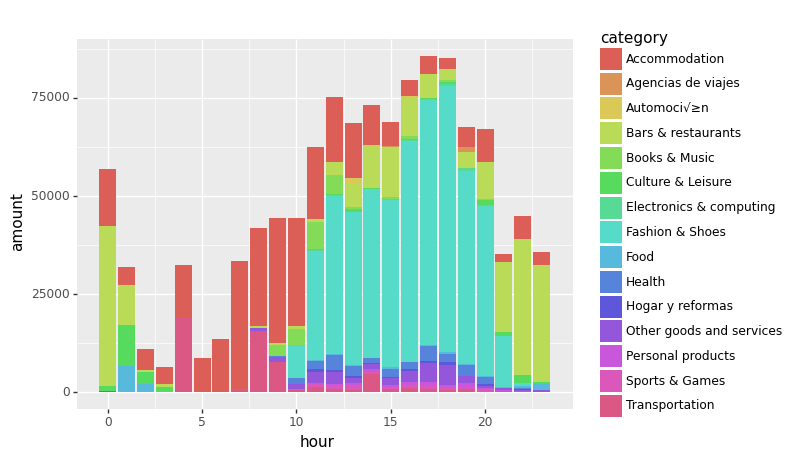

<ggplot: (8783775381893)>

In [22]:
import plotnine
plotnine.ggplot(df, plotnine.aes(x='hour', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 

In [23]:
sum_amount=df.groupby('category').amount.sum()

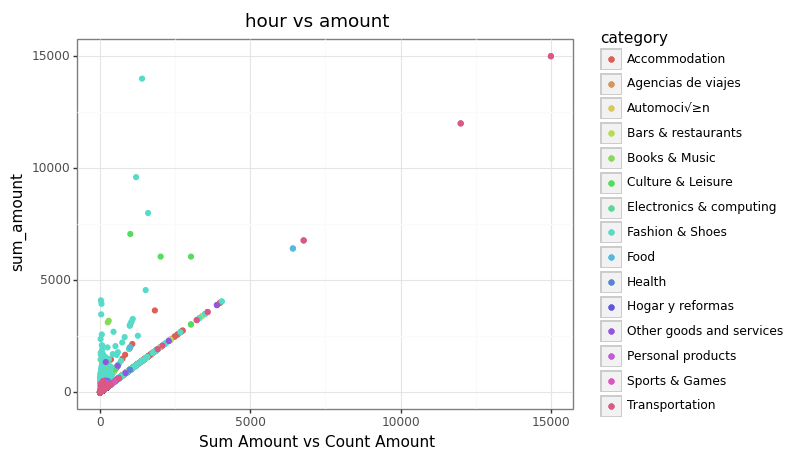

<ggplot: (8783756374423)>

In [24]:
(ggplot(df)+ aes(x="amount",y="amount", color='category')
 + geom_point()
 + plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "point")
 + labs(title='hour vs amount', x='Sum Amount vs Count Amount', y='sum_amount')
 + theme_bw()
)



In [62]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=df['Country_name'].values

# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0,,background_color="white").generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

NameError: name 'stopwords' is not defined

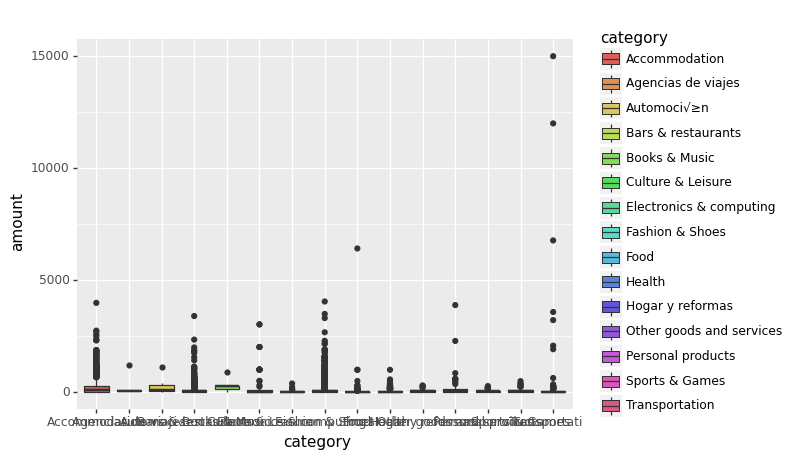

<ggplot: (8783755067185)>

In [34]:
ggplot(df,aes(x ="category", y ="amount"))+ geom_boxplot(aes(fill = "category")) 
#+ geom_jitter(alpha = 0.4)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Get the categories, sorted alphabetically
species = sorted(df["Income_classification "].unique())

# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [df[df["Income_classification "] == specie]["category"].values for specie in species]

# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

In [43]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3","#2a475e"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0, 1, 2, 3]

# Horizontal lines
HLINES = [40, 50, 60, 70]

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

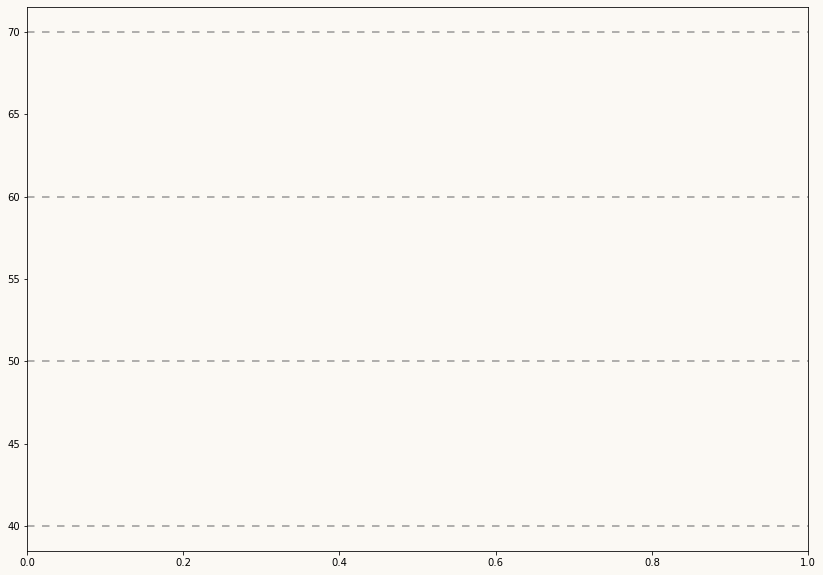

In [44]:
fig, ax = plt.subplots(figsize= (14, 10))

# Some layout stuff ----------------------------------------------
# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 100, color=color, alpha=0.4)

In [ ]:
#pip install dash

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Olympic medals won by countries'),
    dcc.Graph(id="graph"),
    html.P("Medals included:"),
    dcc.Checklist(
        id='medals',
        options=["gold", "silver", "bronze"],
        value=["gold", "silver"],
    ),
])


@app.callback(
    Output("graph", "figure"), 
    Input("medals", "value"))
def filter_heatmap(cols):
    df = px.data.medals_wide(indexed=True) # replace with your own data source
    fig = px.imshow(df[cols])
    return fig


app.run_server(debug=True)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(df["amount"],df["category"],
                    texttemplate="%{text}",
                    textfont={"size":20}))

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='Magnitude', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

In [ ]:
heatmaply(as.matrix(df),seriate = "mean", row_dend_left = TRUE,plot_method = "plotly")

In [ ]:
import numpy as np
ggplot(df)+ aes(x="hour",y="amount", color='category')+\
geom_point()+\
stat_summary(
    mapping=aes(x="hour", y="amount"),
    fun_y=sum
)

In [ ]:
plotnine.ggplot(df, plotnine.aes(x="hour",y="amount", color='category'))+ \
plotnine.geom_point()+ \
plotnine.stat_summary(plotnine.aes(fun_y = sum, geom = "text"))

In [ ]:
#labs(title='hour vs amount', x='Engine Displacement, in Litres', y='Highway Miles per Gallon'))

In [ ]:
import plotly.express as px
fig = px.treemap(df, path=[px.Constant("all"), 'Region', 'customer_country'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
import plotly.express as px
fig = px.treemap(df, path=[px.Constant("all"), 'daytime', 'hour'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [50]:
# Diamonds dataset is provided by R natively
#head(diamonds)
 
# basic example
ggplot(df, aes(x ="daytime", y = "category", fill = "category"))+geom_density_ridges()+theme_ridges()+theme(legend.position == "none")

NameError: name 'geom_density_ridges' is not defined